In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 im1.jpg   im2.jpg   imgOut.png   lab5.ipynb  'lab5_template (1).ipynb'


/usr/local/lib/python3.6/dist-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


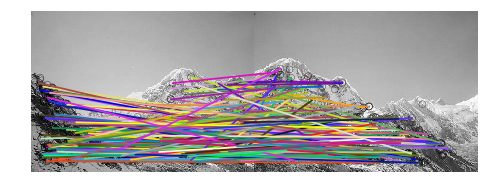

In [2]:
#version1:step1-step3
from skimage.color import gray2rgb
from skimage import transform
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

filename1 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/im1.jpg'
filename2 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/im2.jpg'

image0 = io.imread(filename1, as_grey=True)
image1 = io.imread(filename2, as_grey=True)

#image0 = rgb2gray(image0)
#image1 = rgb2gray(image1)

#step1
#Feature detection and matching
from skimage.feature import ORB, match_descriptors
# Initiate ORB detector
# your code #
# oriented FAST detection method and the rotated BRIEF descriptors.
orb = ORB(n_keypoints=500, fast_threshold=0.05)

#step2
# Find the keypoints and descriptors
# your code #
orb.detect_and_extract(image0)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

#orb, the same detecter run multiple times and overwrite the keypoints and descriptors 
orb.detect_and_extract(image1)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

# initialize Brute-Force matcher and exclude outliers. See match descriptor function.
# your code #
#match points in correct order 
matches12 = match_descriptors(descriptors1,descriptors2,cross_check=True)
 
  
#test the match 
from skimage.feature import plot_matches
fig,ax = plt.subplots(1,1,figsize=(8,8))
plot_matches(ax,image0,image1,keypoints1,keypoints2,matches12)
ax.axis("off")


#step3


# Compute homography matrix using ransac and ProjectiveTransform
# your code #
# model_robust, inliers = ransac ...
#the part is doing the transform estimation, use ransac to filter out the wrong matches
#it iterative process base on randomly chosen subsets so that rejecting outliers and  pick the best matches
#pick two random value to draw a line, counter how muany data points looks like close the line, 
#recursive call until find the prefect model, which is the ProjectiveTransform
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
#ransac and ProjectiveTransform reference:/n
#http://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=projectivetransform#skimage.transform.ProjectiveTransform
#http://scikit-image.org/docs/dev/auto_examples/transform/plot_matching.html?highlight=model_robust%20inliers%20ransac
#https://stackoverflow.com/questions/28636080/skimage-coordinate-system-confusion-about-row-column-ordering
src = keypoints2[matches12[:, 1]][:, ::-1]#reverse the row
dst = keypoints1[matches12[:, 0]][:, ::-1]
model_robust, inliers =ransac((src, dst), ProjectiveTransform,min_samples=4, residual_threshold=2)



/usr/local/lib/python3.6/dist-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


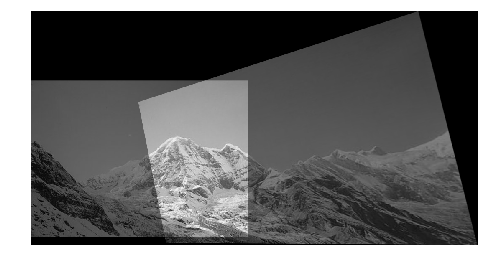

In [3]:
#version1:complete code
from skimage.color import gray2rgb
from skimage import transform
from skimage import io
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2


filename1 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/im1.jpg'
filename2 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/im2.jpg'

image0 = io.imread(filename1, as_grey=True)
image1 = io.imread(filename2, as_grey=True)

#image0 = rgb2gray(image0)
#image1 = rgb2gray(image1)

#step1
#Feature detection and matching
from skimage.feature import ORB, match_descriptors
# Initiate ORB detector
# your code #
# oriented FAST detection method and the rotated BRIEF descriptors.
orb = ORB(n_keypoints=800, fast_threshold=0.05)

#step2
# Find the keypoints and descriptors
# your code #
orb.detect_and_extract(image0)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

#orb, the same detecter run multiple times and overwrite the keypoints and descriptors 
orb.detect_and_extract(image1)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

# initialize Brute-Force matcher and exclude outliers. See match descriptor function.
# your code #
#match points in correct order 
matches12 = match_descriptors(descriptors1,descriptors2,cross_check=True)
 


#step3


# Compute homography matrix using ransac and ProjectiveTransform
# your code #
# model_robust, inliers = ransac ...
#the part is doing the transform estimation, use ransac to filter out the wrong matches
#it iterative process base on randomly chosen subsets so that rejecting outliers and  pick the best matches
#pick two random value to draw a line, counter how muany data points looks like close the line, 
#recursive call until find the prefect model, which is the ProjectiveTransform
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
#ransac and ProjectiveTransform reference:/n
#http://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=projectivetransform#skimage.transform.ProjectiveTransform
#http://scikit-image.org/docs/dev/auto_examples/transform/plot_matching.html?highlight=model_robust%20inliers%20ransac
#https://stackoverflow.com/questions/28636080/skimage-coordinate-system-confusion-about-row-column-ordering
src = keypoints2[matches12[:, 1]][:, ::-1]#reverse the row
dst = keypoints1[matches12[:, 0]][:, ::-1]
model_robust, inliers =ransac((src, dst), ProjectiveTransform,min_samples=4, residual_threshold=2)


#step4
#Warping
#Next, we produce the panorama itself. The first step is to find the shape of the output image by considering the extents of all warped images.

r, c = image1.shape[:2]

# Note that transformations take coordinates in
# (x, y) format, not (row, column), in order to be
# consistent with most literature.
corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

# Warp the image corners to their new positions.
warped_corners = model_robust(corners)

# Find the extents of both the reference image and
# the warped target image.
all_corners = np.vstack((warped_corners, corners))

corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)

output_shape = (corner_max - corner_min)
output_shape = np.ceil(output_shape[::-1])

#The images are now warped according to the estimated transformation model.

#A shift is added to ensure that both images are visible in their entirety. Note that warp takes the inverse mapping as input.

from skimage.exposure import rescale_intensity
from skimage.transform import warp
from skimage.transform import SimilarityTransform

offset = SimilarityTransform(translation=-corner_min)

image0_ = warp(image0, offset.inverse,
               output_shape=output_shape)

image1_ = warp(image1, (model_robust + offset).inverse,
               output_shape=output_shape)

#An alpha channel is added to the warped images before merging them into a single image:

def add_alpha(image, background=-1):
    """Add an alpha layer to the image.

    The alpha layer is set to 1 for foreground
    and 0 for background.
    """
    rgb = gray2rgb(image)
    alpha = (image != background)
    return np.dstack((rgb, alpha))


#add alpha to the image0 and image1

#your code
image0_alpha = add_alpha(image0_)
image1_alpha = add_alpha(image1_)

#merge the alpha added image

#your code
#merged = ...
merged = (image0_alpha + image1_alpha)

alpha = merged[..., 3]
merged /= np.maximum(alpha, 1)[..., np.newaxis]
# The summed alpha layers give us an indication of
# how many images were combined to make up each
# pixel.  Divide by the number of images to get
# an average.


#show and save the output image as '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/imgOut.png'
#your code
#plot image
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.axis("off")
ax.imshow(merged)

#store as image png

path='/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files'
io.imsave(os.path.join(path, 'imgOut.png'), merged)
#plt.xticks([]),plt.yticks([])
#io.imshow(merged)



/usr/local/lib/python3.6/dist-packages/skimage/feature/match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


(-0.5, 1057.5, 547.5, -0.5)

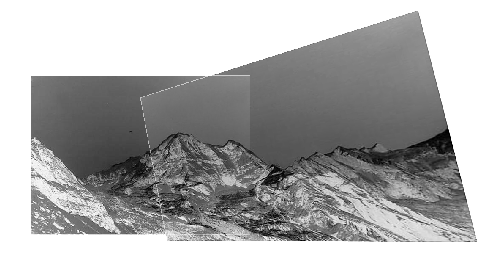

In [4]:
#version2 without using the given add_alpha function 
from skimage.color import gray2rgb
from skimage import transform
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

filename1 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/im1.jpg'
filename2 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/im2.jpg'

image0 = io.imread(filename1, as_grey=True)
image1 = io.imread(filename2, as_grey=True)

#image0 = rgb2gray(image0)
#image1 = rgb2gray(image1)


#Feature detection and matching
from skimage.feature import ORB, match_descriptors
# Initiate ORB detector
# your code #
#oriented fast and rotated brief
#
orb = ORB(n_keypoints=800, fast_threshold=0.05)


# Find the keypoints and descriptors
# your code #
orb.detect_and_extract(image0)
keypoints1 = orb.keypoints
descriptors1 = orb.descriptors

#orb, the same detecter run multiple times and overwrite the keypoints and descriptors 
orb.detect_and_extract(image1)
keypoints2 = orb.keypoints
descriptors2 = orb.descriptors

# initialize Brute-Force matcher and exclude outliers. See match descriptor function.
# your code #
#match points in correct order 
matches12 = match_descriptors(descriptors1,descriptors2,cross_check=True)
 



# Compute homography matrix using ransac and ProjectiveTransform
# your code #
# model_robust, inliers = ransac ...
#the part is doing the transform estimation, use ransac to filter out the wrong matches
#it iterative process base on randomly chosen subsets so that rejecting outliers and  pick the best matches
#pick two random value to draw a line, counter how muany data points looks like close the line, 
#recursive call until find the prefect model, which is the ProjectiveTransform
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform
#ransac and ProjectiveTransform reference:/n
#http://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=projectivetransform#skimage.transform.ProjectiveTransform
#http://scikit-image.org/docs/dev/auto_examples/transform/plot_matching.html?highlight=model_robust%20inliers%20ransac
#https://stackoverflow.com/questions/28636080/skimage-coordinate-system-confusion-about-row-column-ordering
src = keypoints2[matches12[:, 1]][:, ::-1]#reverse the row
dst = keypoints1[matches12[:, 0]][:, ::-1]
model_robust, inliers =ransac((src, dst), ProjectiveTransform,min_samples=4, residual_threshold=2)


#Warping
#Next, we produce the panorama itself. The first step is to find the shape of the output image by considering the extents of all warped images.

r, c = image1.shape[:2]

# Note that transformations take coordinates in
# (x, y) format, not (row, column), in order to be
# consistent with most literature.
corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

# Warp the image corners to their new positions.
warped_corners = model_robust(corners)

# Find the extents of both the reference image and
# the warped target image.
all_corners = np.vstack((warped_corners, corners))
# The overall output shape will be max - min
corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)

output_shape = (corner_max - corner_min)
# Ensure integer shape with np.ceil and dtype conversion
output_shape = np.ceil(output_shape[::-1]).astype(int)

#The images are now warped according to the estimated transformation model.

#A shift is added to ensure that both images are visible in their entirety. Note that warp takes the inverse mapping as input.

from skimage.exposure import rescale_intensity
from skimage.transform import warp
from skimage.transform import SimilarityTransform
#remove te middle
offset = SimilarityTransform(translation=-corner_min)


#An alpha channel is added to the warped images before merging them into a single image:

def add_alpha(image, background=-1):
    """Add an alpha layer to the image.

    The alpha layer is set to 1 for foreground
    and 0 for background.
    """
    rgb = gray2rgb(image)
    alpha = (image != background)
    return np.dstack((rgb, alpha))


#add alpha to the image0 and image1

#your code

# Warp pano0 to pano1
pano0_warped = warp(image0, offset.inverse, order=3,output_shape=output_shape, cval=-1)

pano0_mask = (pano0_warped != -1)  # Mask == 1 inside image
pano0_warped[~pano0_mask] = 0      # Return background values to 0

#start to warp
transform01 = (model_robust + offset).inverse

# Translate pano1 into place
pano1_warped = warp(image1,transform01, order=3,output_shape=output_shape, cval=-1)

# Acquire the image mask for later use
pano1_mask = (pano1_warped != -1)  # Mask == 1 inside image
pano1_warped[~pano1_mask] = 0      # Return background values to 0


#your code
## merged = Sum warped images
merged = (pano1_warped + pano0_warped)
# Track the overlap by adding the masks together
#overlap = Sum masks
overlap = (pano0_mask.astype(np.int64)+pano1_mask)
# Normalize through division by `overlap` - but ensure the minimum is 1
normalize = merged/np.fmax(overlap,1)
# The summed alpha layers give us an indication of
# how many images were combined to make up each
# pixel.  Divide by the number of images to get
# an average.


#show and save the output image as '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab5_Files/imgOut.png'
#your code
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(normalize)
ax.axis("off")


